In [20]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import setigen as stg
import blscint as bls
import blimpy as bl
import astropy
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
meta = pd.read_csv('first_11_meta_info.csv', sep=';')
meta['indexes'] = meta['indexes'].str.strip()
meta

,lookalike,node,direction,indexes
0,blc1,blc03,1,"[2,4,7,9,15]"
1,dr_-0.03_freq_933.342681,blc02,-1,"[2,3,4,7,8,9,10,11,12,13,14,15,16]"
2,dr_-0.04_freq_1200.011914,blc04,-1,"[1,2,3,4,5,7,8,9,11,12,13,14,15,16]"
3,dr_-0.04_freq_1312.585393,blc05,-1,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]"
4,dr_-0.04_freq_1333.346684,blc05,-1,"[2,3,4,5,7,8,9,10,11,12,13,14,15,16]"
5,dr_-0.04_freq_1350.008112,blc06,1,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]"
6,dr_-0.04_freq_1365.298917,blc06,1,"[2,3,4,7,9,11,13,15,16]"
7,dr_-0.04_freq_1398.598805,blc06,1,"[2,4]"
8,dr_-0.04_freq_1431.898859,blc06,1,"[2,4,9,15,16]"
9,dr_-0.04_freq_1485.008851,blc07,1,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]"


In [5]:
drifts = pd.read_csv('first_11_drift_rates.csv', sep=';')
drifts.head()

,panel_id,filename,blc1,dr_-0.03_freq_933.342681,dr_-0.04_freq_1200.011914,dr_-0.04_freq_1312.585393,dr_-0.04_freq_1333.346684,dr_-0.04_freq_1350.008112,dr_-0.04_freq_1365.298917,dr_-0.04_freq_1398.598805,dr_-0.04_freq_1431.898859,dr_-0.04_freq_1485.008851,dr_-0.04_freq_1498.498799
0,0,blcxx_1421-490_S_2019-04-29T12:39:50.000.fil,NaN,NaN,NaN,-0.050000,NaN,0.042705,NaN,NaN,NaN,0.028557,NaN
1,1,blcxx_1421-490_R_2019-04-29T12:46:00.000.fil,NaN,NaN,-0.050000,-0.041303,NaN,0.020681,NaN,NaN,NaN,0.016333,NaN
2,2,blcxx_ProxCen_S_2019-04-29T13:02:35.000.fil,0.031202,-0.023627,-0.031904,-0.033587,-0.036673,0.029800,0.034569,0.033166,0.035571,0.032365,0.036774
3,3,blcxx_1421-490_S_2019-04-29T13:34:59.000.fil,NaN,-0.030220,-0.022645,-0.013246,-0.037796,0.037936,0.037936,NaN,NaN,0.045591,0.042786
4,4,blcxx_ProxCen_S_2019-04-29T13:47:46.000.fil,0.030361,-0.024048,-0.028818,-0.027415,-0.031343,0.023627,0.032605,0.034168,0.034569,0.031162,0.036573


In [6]:
centers = pd.read_csv('first_11_start_frequencies.csv', sep=';')
centers.head()

,panel_id,filename,blc1,dr_-0.03_freq_933.342681,dr_-0.04_freq_1200.011914,dr_-0.04_freq_1312.585393,dr_-0.04_freq_1333.346684,dr_-0.04_freq_1350.008112,dr_-0.04_freq_1365.298917,dr_-0.04_freq_1398.598805,dr_-0.04_freq_1431.898859,dr_-0.04_freq_1485.008851,dr_-0.04_freq_1498.498799
0,0,blcxx_1421-490_S_2019-04-29T12:39:50.000.fil,NaN,NaN,NaN,1312.586403,NaN,1350.008980,NaN,NaN,NaN,1485.009880,NaN
1,1,blcxx_1421-490_R_2019-04-29T12:46:00.000.fil,NaN,NaN,1200.013012,1312.586388,NaN,1350.008995,NaN,NaN,NaN,1485.009895,NaN
2,2,blcxx_ProxCen_S_2019-04-29T13:02:35.000.fil,982.002392,933.343426,1200.012978,1312.586357,1333.347755,1350.009026,1365.299881,1398.599880,1431.899876,1485.009930,1498.499870
3,3,blcxx_1421-490_S_2019-04-29T13:34:59.000.fil,NaN,933.343384,1200.012920,1312.586296,1333.347691,1350.009083,1365.299946,NaN,NaN,1485.009991,1498.499939
4,4,blcxx_ProxCen_S_2019-04-29T13:47:46.000.fil,982.002472,933.343369,1200.012901,1312.586281,1333.347668,1350.009106,1365.299973,1398.599972,1431.899971,1485.010014,1498.499969


In [7]:
prefix_template = '/mnt_blpd2/datax/PKSUWL/blcxx/PKSUWL/'

In [8]:
blc1 = meta.loc[0]
blc1

lookalike            blc1
node                blc03
direction               1
indexes      [2,4,7,9,15]
Name: 0, dtype: object

In [8]:
drifts[blc1['lookalike']]

0          NaN
1          NaN
2     0.031202
3          NaN
4     0.030361
5          NaN
6          NaN
7     0.030641
8          NaN
9     0.026994
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15    0.010301
16         NaN
Name: blc1, dtype: float64

In [9]:
(blc1['indexes'])

'[2,4,7,9,15]'

In [10]:
import json
json.loads(blc1['indexes'])

[2, 4, 7, 9, 15]

In [39]:
idx = json.loads(blc1['indexes'])
print(idx[0])
drifts[blc1['lookalike']].loc[idx[0]], centers[blc1['lookalike']].loc[idx[0]]

2


(0.0312024048096192, 982.002391815186)

In [18]:
drifts['filename'].loc[idx[0]]

'blcxx_ProxCen_S_2019-04-29T13:02:35.000.fil'

In [21]:
filename = (prefix_template + drifts['filename'].loc[idx[0]]).replace('blcxx', blc1['node'])
filename

'/mnt_blpd2/datax/PKSUWL/blc03/PKSUWL/blc03_ProxCen_S_2019-04-29T13:02:35.000.fil'

In [22]:
!ls $filename

/mnt_blpd2/datax/PKSUWL/blc03/PKSUWL/blc03_ProxCen_S_2019-04-29T13:02:35.000.fil


982.002391815186 0.0312024048096192 107


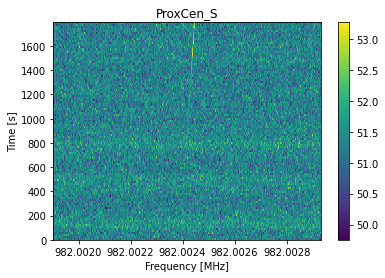

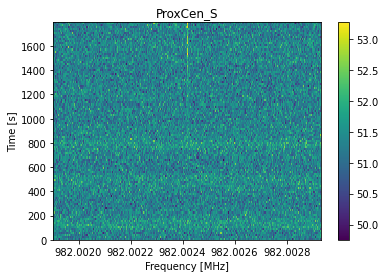

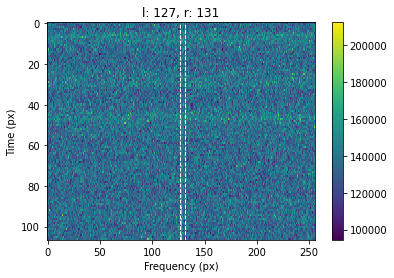

In [63]:
drift_rate = drifts[blc1['lookalike']].loc[idx[0]]
center_freq = centers[blc1['lookalike']].loc[idx[0]]

frame = bls.centered_frame(fn=filename,
                           drift_rate=drift_rate,
                           center_freq=center_freq,
                           fchans=256)
frame.bl_plot()
plt.show()

frame = stg.dedrift(frame, drift_rate=drift_rate)
frame.bl_plot()
plt.show()

l, r, _ = bls.threshold_bounds(frame.integrate())
bls.plot_bounds(frame, l, r, lw=1)
plt.title(f"l: {l}, r: {r}")
plt.show()

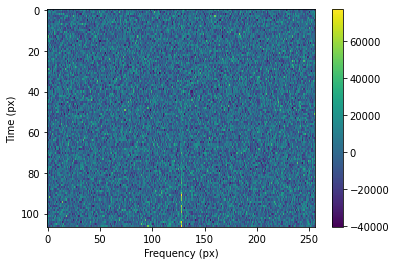

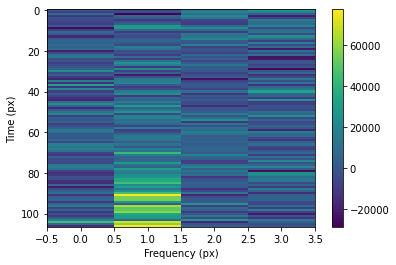

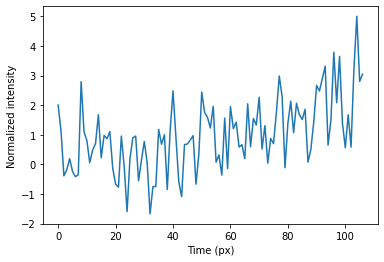

In [65]:
n_frame = bls.t_norm_frame(frame)

# n_frame = stg.sigma_clip_norm(frame, axis=1)
n_frame.plot()
plt.show()

tr_frame = n_frame.get_slice(l, r)
tr_frame.plot()
plt.show()

tr_ts = tr_frame.integrate('f')
tr_ts /= tr_ts.mean()

plt.plot(tr_ts)
plt.ylabel('Normalized intensity')
plt.xlabel('Time (px)')
plt.show()

In [13]:
fn='/mnt_blpd2/datax/PKSUWL/blc03/PKSUWL/blc03_ProxCen_S_2019-04-29T13:02:35.000.fil'
container = bl.Waterfall(fn, load_data=False).container
tchans = container.file_shape[0]
df = abs(container.header['foff']) * 1e6
dt = container.header['tsamp']
vars(container)

{'t_begin': 0,
 't_end': 107,
 'available_memory': 249810780160,
 'max_data_array_size': 248737038336,
 'header_keywords_types': {'telescope_id': '<l',
  'machine_id': '<l',
  'data_type': '<l',
  'barycentric': '<l',
  'pulsarcentric': '<l',
  'nbits': '<l',
  'nsamples': '<l',
  'nchans': '<l',
  'nifs': '<l',
  'nbeams': '<l',
  'ibeam': '<l',
  'rawdatafile': 'str',
  'source_name': 'str',
  'az_start': '<d',
  'za_start': '<d',
  'tstart': '<d',
  'tsamp': '<d',
  'fch1': '<d',
  'foff': '<d',
  'refdm': '<d',
  'period': '<d',
  'src_raj': 'angle',
  'src_dej': 'angle'},
 'filename': '/mnt_blpd2/datax/PKSUWL/blc03/PKSUWL/blc03_ProxCen_S_2019-04-29T13:02:35.000.fil',
 'load_data': False,
 'header': {'telescope_id': 4,
  'nbits': 32,
  'source_name': 'ProxCen_S',
  'data_type': 1,
  'nchans': 33554432,
  'ibeam': 1,
  'barycentric': 0,
  'pulsarcentric': 0,
  'tsamp': 16.777216,
  'foff': 3.814697265625e-06,
  'src_raj': <Angle 14.49526361 hourangle>,
  'src_dej': <Angle -61.998288

In [17]:
from astropy.time import Time

In [18]:
t = Time(58602.54346064814, format='mjd')
t.iso, t.unix

('2019-04-29 13:02:35.000', 1556542954.9999995)

In [22]:
np.linspace(0, tchans * dt, tchans, endpoint=False) + t.unix

array([1.55654295e+09, 1.55654297e+09, 1.55654299e+09, 1.55654301e+09,
       1.55654302e+09, 1.55654304e+09, 1.55654306e+09, 1.55654307e+09,
       1.55654309e+09, 1.55654311e+09, 1.55654312e+09, 1.55654314e+09,
       1.55654316e+09, 1.55654317e+09, 1.55654319e+09, 1.55654321e+09,
       1.55654322e+09, 1.55654324e+09, 1.55654326e+09, 1.55654327e+09,
       1.55654329e+09, 1.55654331e+09, 1.55654332e+09, 1.55654334e+09,
       1.55654336e+09, 1.55654337e+09, 1.55654339e+09, 1.55654341e+09,
       1.55654342e+09, 1.55654344e+09, 1.55654346e+09, 1.55654348e+09,
       1.55654349e+09, 1.55654351e+09, 1.55654353e+09, 1.55654354e+09,
       1.55654356e+09, 1.55654358e+09, 1.55654359e+09, 1.55654361e+09,
       1.55654363e+09, 1.55654364e+09, 1.55654366e+09, 1.55654368e+09,
       1.55654369e+09, 1.55654371e+09, 1.55654373e+09, 1.55654374e+09,
       1.55654376e+09, 1.55654378e+09, 1.55654379e+09, 1.55654381e+09,
       1.55654383e+09, 1.55654384e+09, 1.55654386e+09, 1.55654388e+09,
      

In [24]:
(np.linspace(0, tchans * dt, tchans, endpoint=False) + t.unix)[5]

1556543038.8860795

In [25]:
dt

16.777216

In [26]:
Time(1556542954.9999995, format='unix').mjd

58602.54346064814

In [28]:
container.header['tstart']

58602.54346064814

In [30]:
astropy.stats.sigma_clip

<function astropy.stats.sigma_clipping.sigma_clip(data, sigma=3, sigma_lower=None, sigma_upper=None, maxiters=5, cenfunc='median', stdfunc='std', axis=None, masked=True, return_bounds=False, copy=True, grow=False)>